###	OUTLINE
#### Tools I used for each step?
 * I used SQL to ingest and pull data from the database, then downloaded the data to my local machine as a csv file.
 * I used Python Pandas to read and manipulate data. Drop null values from the dataframe. Then I compute the moving average for my home city and the global average, respectively 
 * I used Python's Matplotlib and Seaborn to visualize data.
#### Calculate the moving average
 * First of all, I filter out all values which city name is Ho Chi Minh
 * Then I used rolling(5).mean() method to caculate the moving average of 5 nearest temperature value
#### key considerations when deciding how to visualize the trends
 * I consider the year when I compare Ho Chi Minh city with Global in order to keep these two values in the same range of years.


#### Some SQL code snipsets to ingest data

```
SELECT * FROM city_list;
SELECT * FROM city_data;
SELECT * FROM global_data;
```

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

city_data = pd.read_csv('data/city_data.csv')
city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [3]:
city_list = pd.read_csv('data/city_list.csv')
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [4]:
global_data = pd.read_csv('data/global_data.csv')
global_data.head()


,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [10]:
city_data = city_data.dropna()
global_data = global_data.dropna()

In [11]:
city_data_hcm = city_data[city_data['city'] == 'Ho Chi Minh City']
city_data_hcm.head()

,year,city,country,avg_temp
25763,1825,Ho Chi Minh City,Vietnam,27.11
25777,1839,Ho Chi Minh City,Vietnam,26.69
25778,1840,Ho Chi Minh City,Vietnam,26.63
25779,1841,Ho Chi Minh City,Vietnam,27.02
25780,1842,Ho Chi Minh City,Vietnam,26.87


In [66]:
city_data_hcm['moving_average'] = city_data_hcm['avg_temp'].rolling(5).mean()
city_data_hcm.head()

C:\Users\quanvm4\AppData\Local\Temp\ipykernel_19452\731189757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data_hcm['moving_average'] = city_data_hcm['avg_temp'].rolling(5).mean()


,year,city,country,avg_temp,moving_average
25763,1825,Ho Chi Minh City,Vietnam,27.11,NaN
25777,1839,Ho Chi Minh City,Vietnam,26.69,NaN
25778,1840,Ho Chi Minh City,Vietnam,26.63,NaN
25779,1841,Ho Chi Minh City,Vietnam,27.02,NaN
25780,1842,Ho Chi Minh City,Vietnam,26.87,26.864


In [17]:
global_data['moving_average'] = global_data['avg_temp'].rolling(5).mean()
global_data.head(10)

,year,avg_temp,moving_average
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,7.868
5,1755,8.36,7.796
6,1756,8.85,7.970
7,1757,9.02,8.618
8,1758,6.74,8.288
9,1759,7.99,8.192


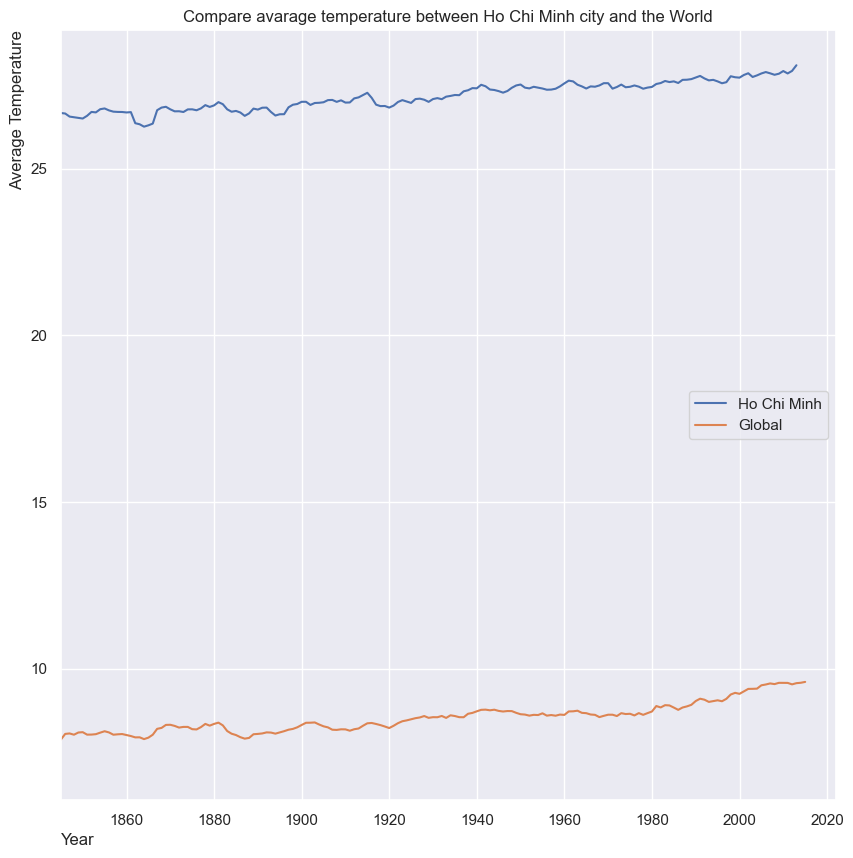

In [64]:
sns.lineplot(city_data_hcm, x=city_data_hcm['year'], y=city_data_hcm['moving_average'], label='Ho Chi Minh')
sns.lineplot(global_data, x=global_data['year'], y=global_data['moving_average'], label='Global')

plt.xlabel("Year", loc = 'left')
plt.ylabel("Average Temperature", loc = 'top')

plt.title("Compare avarage temperature between Ho Chi Minh city and the World")
plt.legend(loc='right')

plt.xlim(1845,2022)

plt.show()

#### Observations
* Temperatues is increase stedily though years
* Ho Chi Minh city Temperatures are approximately 20 degrees higher than the global average.
* The temperature in Ho Chi Minh City dropped dramatically between 1862 and 1864.
* Temperatues of both Ho Chi Minh city and Global is rise up and down like waves